# Simple Audio Preprocessing & Augmentations

1) Preprocessing
- Waveform
- FFT Power Spectrum
- Power Spectrogram
- SFTF Spectrogram
- Log Spectrogram
- MFCCs

2) Augmentations
- Add Noise
- Random Shifting
- Pitch & Speed
- Pitch
- Speed
- Amplify value
- Hpss
- Stretching

In [2]:
import pandas as pd 
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

import os

df = pd.read_csv('./train_metadata.csv')


FileNotFoundError: [Errno 2] No such file or directory: './train_metadata.csv'

## df

In [136]:
df

primary_label secondary_labels      type  latitude  longitude  \
0            asbfly               []  ['call']   39.2297   118.1987   
1            asbfly               []  ['song']   51.4030   104.6401   
2            asbfly               []  ['song']   36.3319   127.3555   
3            asbfly               []  ['call']   21.1697    70.6005   
4            asbfly               []  ['call']   15.5442    73.7733   
...             ...              ...       ...       ...        ...   
24454       zitcis1               []      ['']   43.5925     4.5434   
24455       zitcis1               []      ['']   43.5925     4.5434   
24456       zitcis1               []      ['']   51.1207     4.5607   
24457       zitcis1               []      ['']   41.5607    -8.4236   
24458       zitcis1               []      ['']   13.7747   100.8919   

          scientific_name             common_name  \
0      Muscicapa dauurica  Asian Brown Flycatcher   
1      Muscicapa dauurica  Asian Brown Flycatcher   
2      Muscicapa dauurica  Asian Brown Flycatcher   
3      Muscicapa dauurica  Asian Brown Flycatcher   
4      Muscicapa dauurica  Asian Brown Flycatcher   
...                   ...                     ...   
24454  Cisticola juncidis       Zitting Cisticola   
24455  Cisticola juncidis       Zitting Cisticola   
24456  Cisticola juncidis       Zitting Cisticola   
24457  Cisticola juncidis       Zitting Cisticola   
24458  Cisticola juncidis       Zitting Cisticola   

                                  author  \
0                         Matt Slaymaker   
1                       Magnus Hellström   
2                          Stuart Fisher   
3                              vir joshi   
4      Albert Lastukhin & Sergei Karpeev   
...                                  ...   
24454                  Chèvremont Fabian   
24455                  Chèvremont Fabian   
24456                         Wim Jacobs   
24457                       Jorge Leitão   
24458                         Sam Hambly   

                                                 license  rating  \
0      Creative Commons Attribution-NonCommercial-Sha...     5.0   
1      Creative Commons Attribution-NonCommercial-Sha...     2.5   
2      Creative Commons Attribution-NonCommercial-Sha...     2.5   
3      Creative Commons Attribution-NonCommercial-Sha...     4.0   
4      Creative Commons Attribution-NonCommercial-Sha...     4.0   
...                                                  ...     ...   
24454  Creative Commons Attribution-NonCommercial-Sha...     5.0   
24455  Creative Commons Attribution-NonCommercial-Sha...     4.0   
24456  Creative Commons Attribution-NonCommercial-Sha...     4.0   
24457  Creative Commons Attribution-NonCommercial-Sha...     4.5   
24458  Creative Commons Attribution-NonCommercial-Sha...     5.0   

                                     url              filename  
0      https://www.xeno-canto.org/134896   asbfly/XC134896.ogg  
1      https://www.xeno-canto.org/164848   asbfly/XC164848.ogg  
2      https://www.xeno-canto.org/175797   asbfly/XC175797.ogg  
3      https://www.xeno-canto.org/207738   asbfly/XC207738.ogg  
4      https://www.xeno-canto.org/209218   asbfly/XC209218.ogg  
...                                  ...                   ...  
24454      https://xeno-canto.org/845747  zitcis1/XC845747.ogg  
24455      https://xeno-canto.org/845817  zitcis1/XC845817.ogg  
24456      https://xeno-canto.org/856176  zitcis1/XC856176.ogg  
24457      https://xeno-canto.org/856723  zitcis1/XC856723.ogg  
24458      https://xeno-canto.org/858550  zitcis1/XC858550.ogg  

[24459 rows x 12 columns]

## Single Audio oog file : 11470

In [137]:
ex = df.loc[11470]
path = './train_audio/'+ex.filename
ex

primary_label                                                 grefla1
secondary_labels                                                   []
type                                                         ['song']
latitude                                                       8.9384
longitude                                                     77.2089
scientific_name                         Chrysocolaptes guttacristatus
common_name                                         Greater Flameback
author                                         Sreekumar Chirukandoth
license             Creative Commons Attribution-NonCommercial-Sha...
rating                                                            3.0
url                                 https://www.xeno-canto.org/428555
filename                                         grefla1/XC428555.ogg
Name: 11470, dtype: object

In [138]:
from IPython.display import Audio
librosa.get_samplerate(path)


32000

In [139]:
sampling_rate = 32000
Audio(path, rate=sampling_rate)

## Signal & Sampling rate

In [140]:
sig, sr = librosa.load(path, sr=sampling_rate, duration=15)
sig, sr, len(sig) / sampling_rate

(array([ 6.9341204e-06,  1.5228780e-05,  2.4475389e-06, ...,
        -5.3085486e-04, -5.4194336e-04, -4.1943975e-04], dtype=float32),
 32000,
 7.653875)

# Various Plots

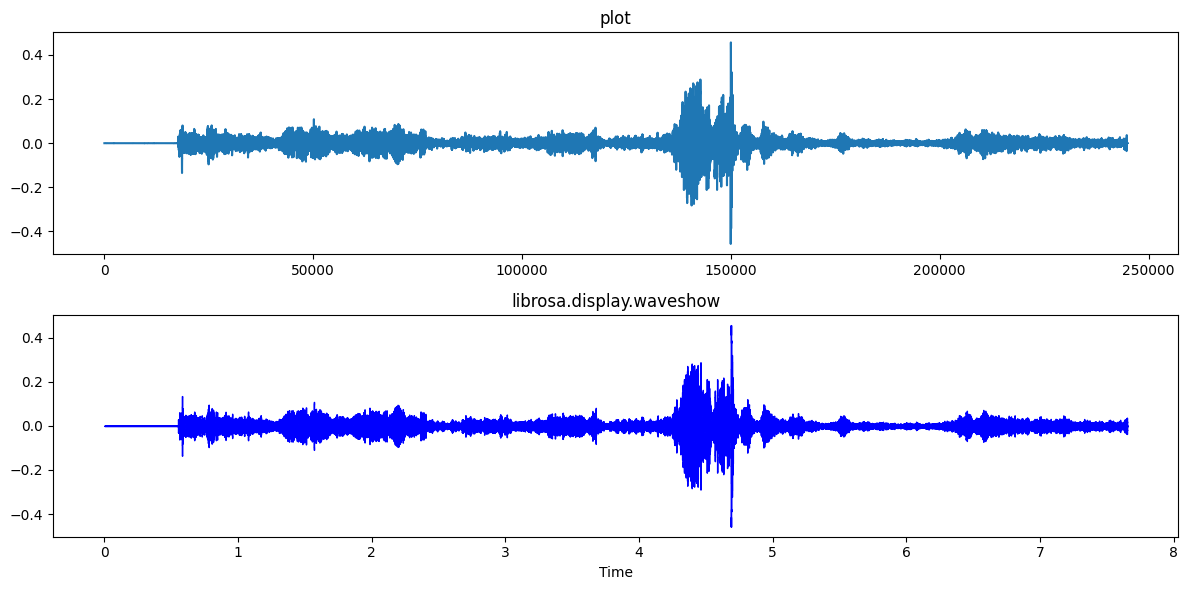

In [141]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 6))
ax0.plot(sig)
ax0.set_title("plot")
librosa.display.waveshow(sig, sr=sr, ax=ax1, color="blue")
ax1.set_title("librosa.display.waveshow")
plt.tight_layout()
plt.show()

## Power Spectrum

Text(0.5, 1.0, 'Power spectrum')

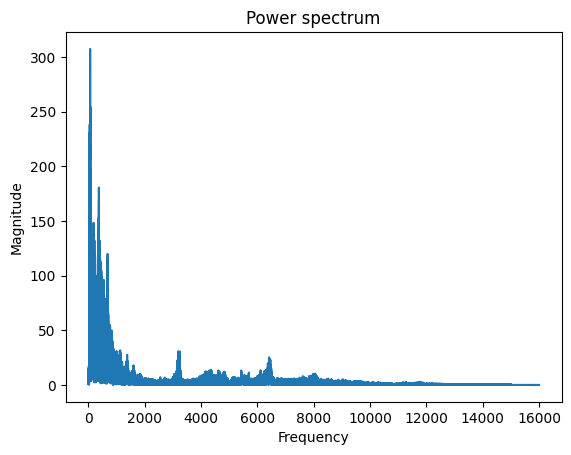

In [142]:
# Fourier -> Spectrum

fft = np.fft.fft(sig)

magnitude = np.abs(fft) 

f = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_f = f[:int(len(magnitude) / 2)]

plt.figure()
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

## Power Spectrogram

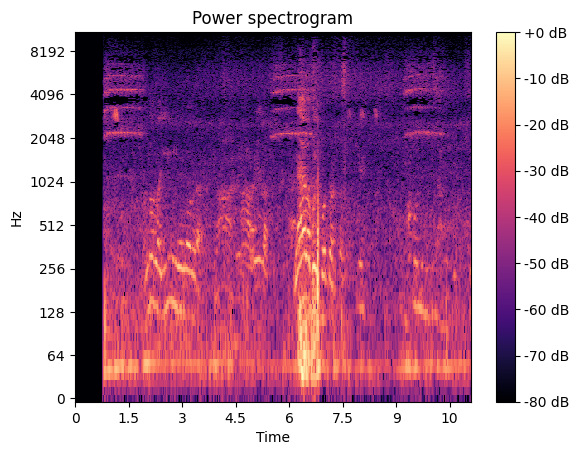

In [143]:
S = np.abs(librosa.stft(sig))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

## STFT Spectrogram

Text(0.5, 1.0, 'Spectrogram (dB)')

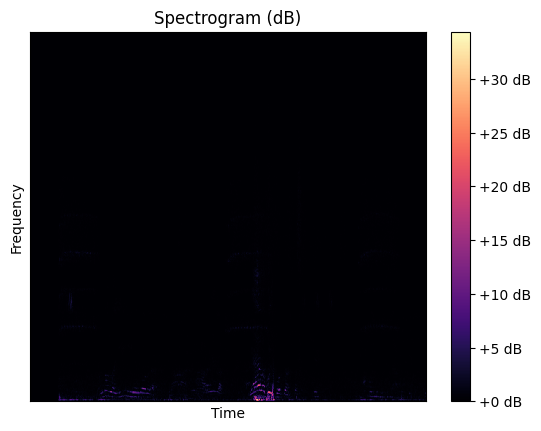

In [144]:
# STFT -> spectrogram

hop_length = 256
n_fft = 1024

hop_length_duration = float(hop_length) / sr
n_fft_duration = float(n_fft) / sr

stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

spectrogram = np.abs(stft)

plt.figure()
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

C:\Users\Beck\AppData\Local\Temp\ipykernel_35140\2704154130.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Xdb = librosa.amplitude_to_db(X)


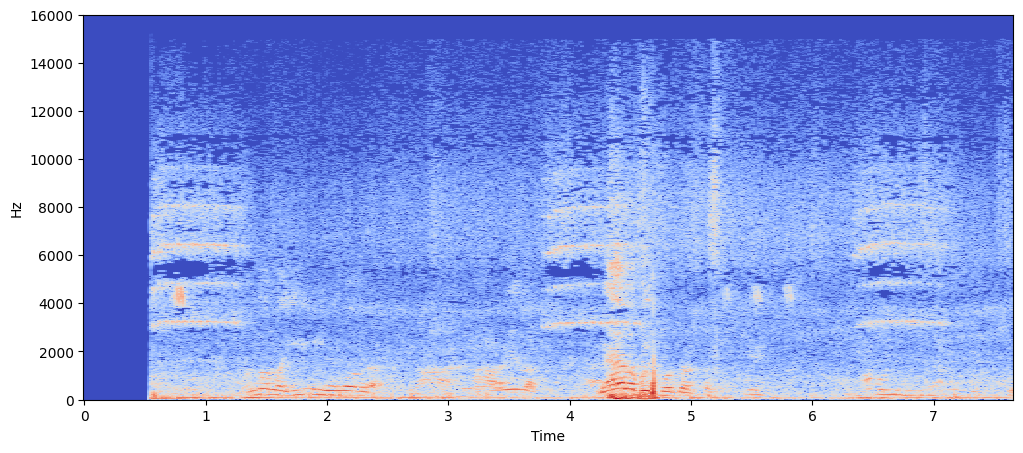

In [145]:
X = librosa.stft(sig.astype('float'))
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.show()

## Log Spectrogram

Text(0.5, 1.0, 'Log Spectrogram (dB)')

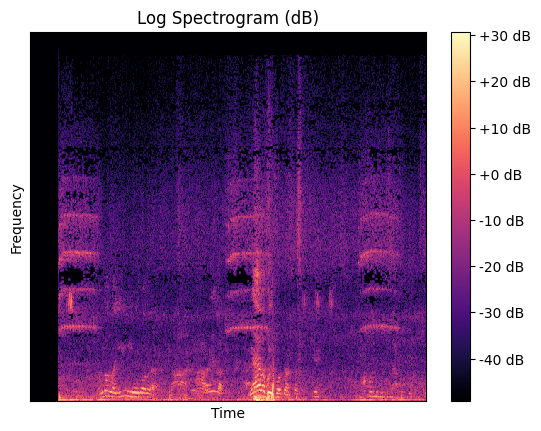

In [146]:
# STFT -> log spectrogram

hop_length = 256
n_fft = 1024

hop_length_duration = float(hop_length) / sr
n_fft_duration = float(n_fft) / sr

stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

magnitude = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Log Spectrogram (dB)")

## MFCCs

Text(0.5, 1.0, 'MFCCs')

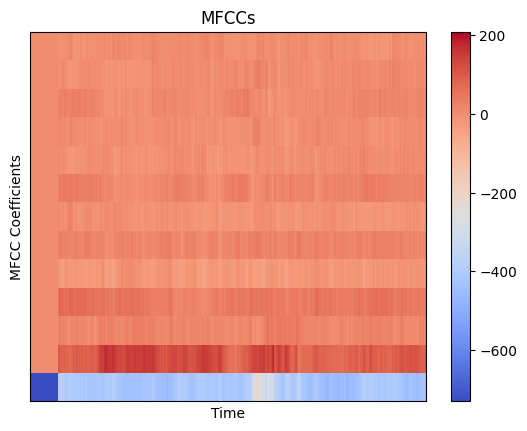

In [147]:
MFCCs = librosa.feature.mfcc(y=sig, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
plt.figure()
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.colorbar()
plt.title('MFCCs')

# Augmentation

In [239]:
def noising(data,noise_factor):
    """
    Add noise to original data.
    Adjust noise factor how much you want to add.
    """
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data
def shifting(data, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max+1)
    if shift_direction == 'right':
        shift = -shift
    elif shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0
    return augmented_data

def change_pitch(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

(80, 1531)


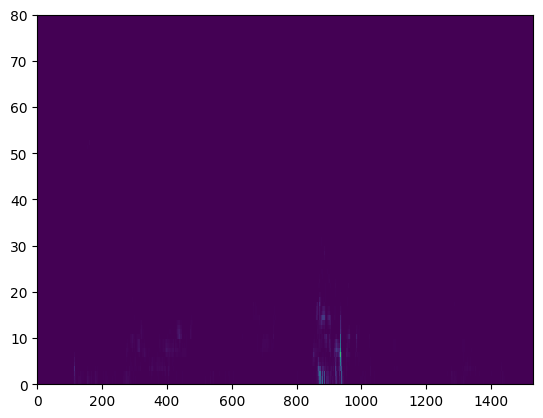

In [240]:
mfcc_data = librosa.feature.melspectrogram(y=sig,sr=sr,n_fft=512,win_length=400,hop_length=160,n_mels=80)
print(mfcc_data.shape)
plt.pcolor(mfcc_data)
plt.show()

## Add Noise

In [241]:
import IPython
noising_data = noising(sig,np.random.uniform(0,0.1))
IPython.display.Audio(data=noising_data, rate=sr)

(80, 1531)


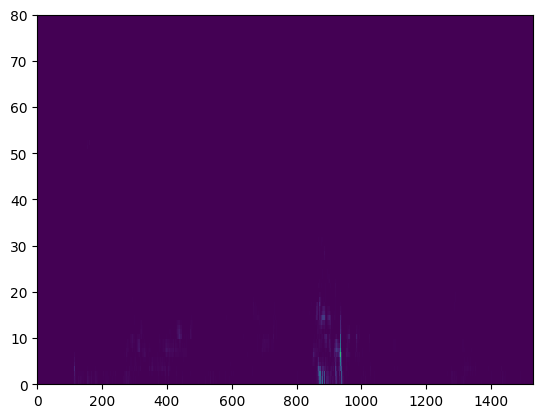

In [242]:
mfcc_data = librosa.feature.melspectrogram(y=noising_data,sr=sr,n_fft=512,win_length=400,hop_length=160,n_mels=80)
print(mfcc_data.shape)
plt.pcolor(mfcc_data)
plt.show()

## Shifting

In [258]:
shifting_data = shifting(sig,sr,0.8,'right')
IPython.display.Audio(data=shifting_data, rate=sr)

(80, 1531)


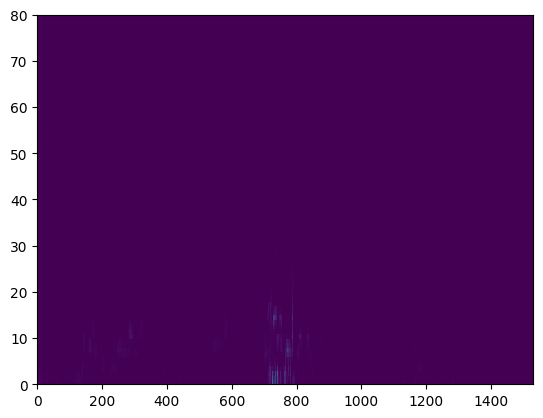

In [259]:
mfcc_data = librosa.feature.melspectrogram(y=shifting_data,sr=sr,n_fft=512,win_length=400,hop_length=160,n_mels=80)
print(mfcc_data.shape)
plt.pcolor(mfcc_data)
plt.show()

## Change Pitch & Speed

In [260]:
y_pitch_speed = sig.copy()
# you can change low and high here
length_change = np.random.uniform(low=0.8, high = 1)
speed_fac = 1.0  / length_change
print("resample length_change = ",length_change)
tmp = np.interp(np.arange(0,len(y_pitch_speed),speed_fac),np.arange(0,len(y_pitch_speed)),y_pitch_speed)
minlen = min(y_pitch_speed.shape[0], tmp.shape[0])
y_pitch_speed *= 0
y_pitch_speed[0:minlen] = tmp[0:minlen]
IPython.display.Audio(y_pitch_speed, rate=sr)

resample length_change =  0.8589372541255753


(80, 1531)


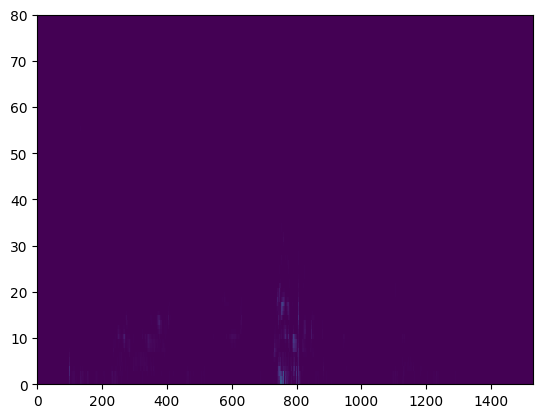

In [261]:
mfcc_data = librosa.feature.melspectrogram(y=y_pitch_speed,sr=sr,n_fft=512,win_length=400,hop_length=160,n_mels=80)
print(mfcc_data.shape)
plt.pcolor(mfcc_data)
plt.show()

## Change Pitch

In [262]:
pitch_data = change_pitch(sig,sr,np.random.randint(-5,5))
IPython.display.Audio(data=pitch_data, rate=sr)

(80, 1531)


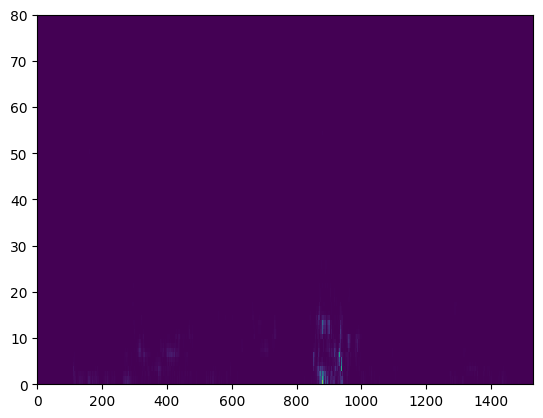

In [263]:
mfcc_data = librosa.feature.melspectrogram(y=pitch_data,sr=sr,n_fft=512,win_length=400,hop_length=160,n_mels=80)
print(mfcc_data.shape)
plt.pcolor(mfcc_data)
plt.show()

## Change Speed

In [264]:
y_speed = sig.copy()
speed_change = np.random.uniform(low=0.9,high=1.1)
print("speed_change = ",speed_change)
tmp = librosa.effects.time_stretch(y=y_speed.astype('float64'), rate=speed_change)
minlen = min(y_speed.shape[0], tmp.shape[0])
y_speed *= 0 
y_speed[0:minlen] = tmp[0:minlen]
IPython.display.Audio(y_speed, rate=sr)

speed_change =  1.076876062588021


(80, 1531)


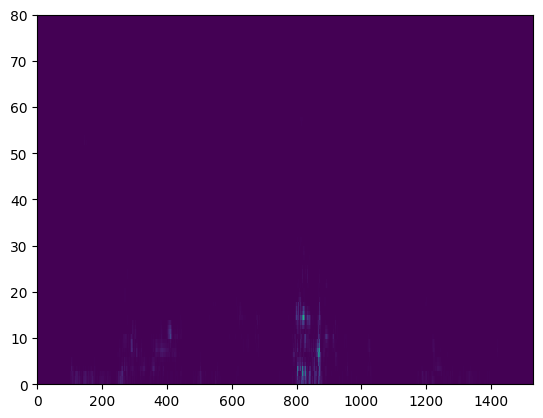

In [265]:
mfcc_data = librosa.feature.melspectrogram(y=y_speed,sr=sr,n_fft=512,win_length=400,hop_length=160,n_mels=80)
print(mfcc_data.shape)
plt.pcolor(mfcc_data)
plt.show()

## Value Augmentation

In [266]:
y_aug = sig.copy()
dyn_change = np.random.uniform(low=1.5,high=3)
print("dyn_change = ",dyn_change)
y_aug = y_aug * dyn_change
print(y_aug[:50])
print(sig[:50])
IPython.display.Audio(y_aug, rate=sr)

dyn_change =  2.6483366487958286
[ 1.8363886e-05  4.0330939e-05  6.4819069e-06  8.2901621e-05
  1.6952186e-05 -9.6859389e-05  8.9782397e-06  1.5731846e-05
 -1.2975928e-05  6.4316620e-05 -1.6853254e-06 -6.5999280e-05
 -1.6758757e-05 -6.4109474e-05 -6.9460715e-05 -6.1272345e-05
  1.7186447e-05  7.9855337e-05  5.8290214e-05  3.8473809e-06
 -7.3653660e-05  4.9138648e-06 -7.0168498e-06  3.8246271e-06
 -7.7253142e-05 -2.6064916e-07 -1.7503720e-06  2.1214506e-05
  2.3562577e-06  4.4930548e-05 -2.1135380e-05  3.1349668e-05
 -3.1032974e-05  1.9694404e-05  8.1845828e-05  6.7177760e-05
  2.1395792e-05 -3.3877275e-06 -1.5145317e-06 -1.2417170e-05
 -6.3086612e-05  1.4884919e-06  2.2788707e-05 -1.7310034e-05
  1.0483959e-05 -4.1156633e-05  8.8370864e-05  1.5923746e-05
 -7.9844904e-06 -1.3103463e-05]
[ 6.9341204e-06  1.5228780e-05  2.4475389e-06  3.1303280e-05
  6.4010692e-06 -3.6573671e-05  3.3901431e-06  5.9402741e-06
 -4.8996521e-06  2.4285668e-05 -6.3637128e-07 -2.4921032e-05
 -6.3280308e-06 -2.4

(80, 1531)


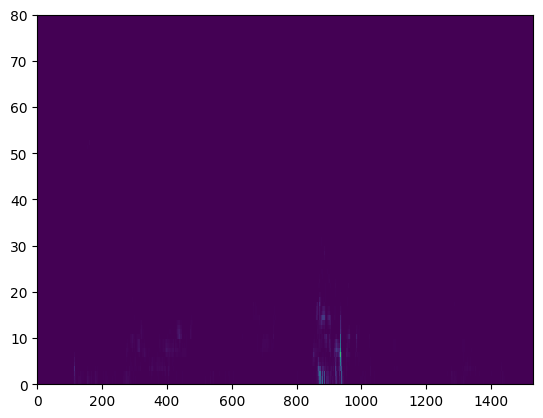

In [267]:
mfcc_data = librosa.feature.melspectrogram(y=y_aug,sr=sr,n_fft=512,win_length=400,hop_length=160,n_mels=80)
print(mfcc_data.shape)
plt.pcolor(mfcc_data)
plt.show()

## Hpss

In [268]:
y_hpss = librosa.effects.hpss(sig.astype('float64'))
print(y_hpss[1][:10])
print(sig[:10])
IPython.display.Audio(y_hpss[1], rate=sr)

[ 3.14414333e-06  7.84399284e-06  9.23120712e-07  1.12041663e-05
  5.67006355e-06 -1.66593788e-05  3.21879765e-06 -1.76024844e-06
  1.21627963e-06  1.11067459e-05]
[ 6.9341204e-06  1.5228780e-05  2.4475389e-06  3.1303280e-05
  6.4010692e-06 -3.6573671e-05  3.3901431e-06  5.9402741e-06
 -4.8996521e-06  2.4285668e-05]


(80, 1531)


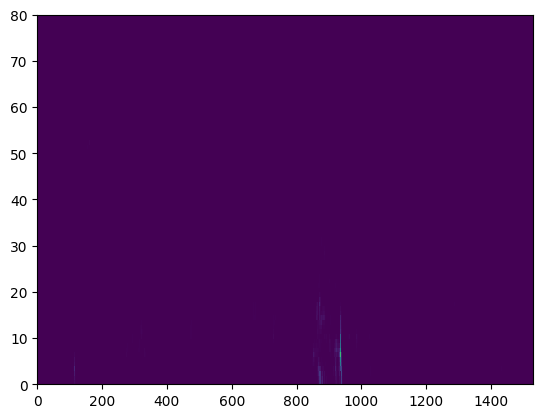

In [269]:
mfcc_data = librosa.feature.melspectrogram(y=y_hpss[1],sr=sr,n_fft=512,win_length=400,hop_length=160,n_mels=80)
print(mfcc_data.shape)
plt.pcolor(mfcc_data)
plt.show()

## Stretching

In [270]:
input_length = len(sig)
streching = sig.copy()
streching = librosa.effects.time_stretch(y=streching.astype('float'), rate=1.1)
if len(streching) > input_length:
    streching = streching[:input_length]
else:
    streching = np.pad(streching, (0, max(0, input_length - len(streching))), "constant")
IPython.display.Audio(streching, rate=sr)

(80, 1531)


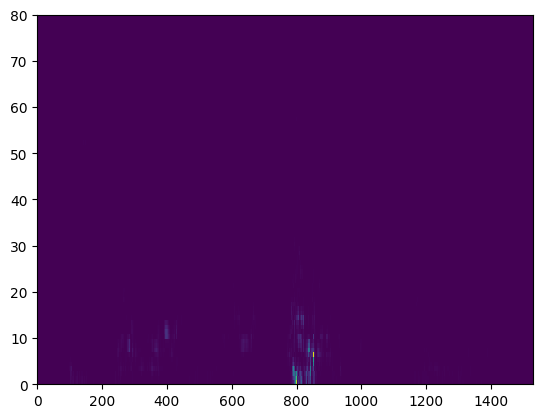

In [271]:
mfcc_data = librosa.feature.melspectrogram(y=streching,sr=sr,n_fft=512,win_length=400,hop_length=160,n_mels=80)
print(mfcc_data.shape)
plt.pcolor(mfcc_data)
plt.show()

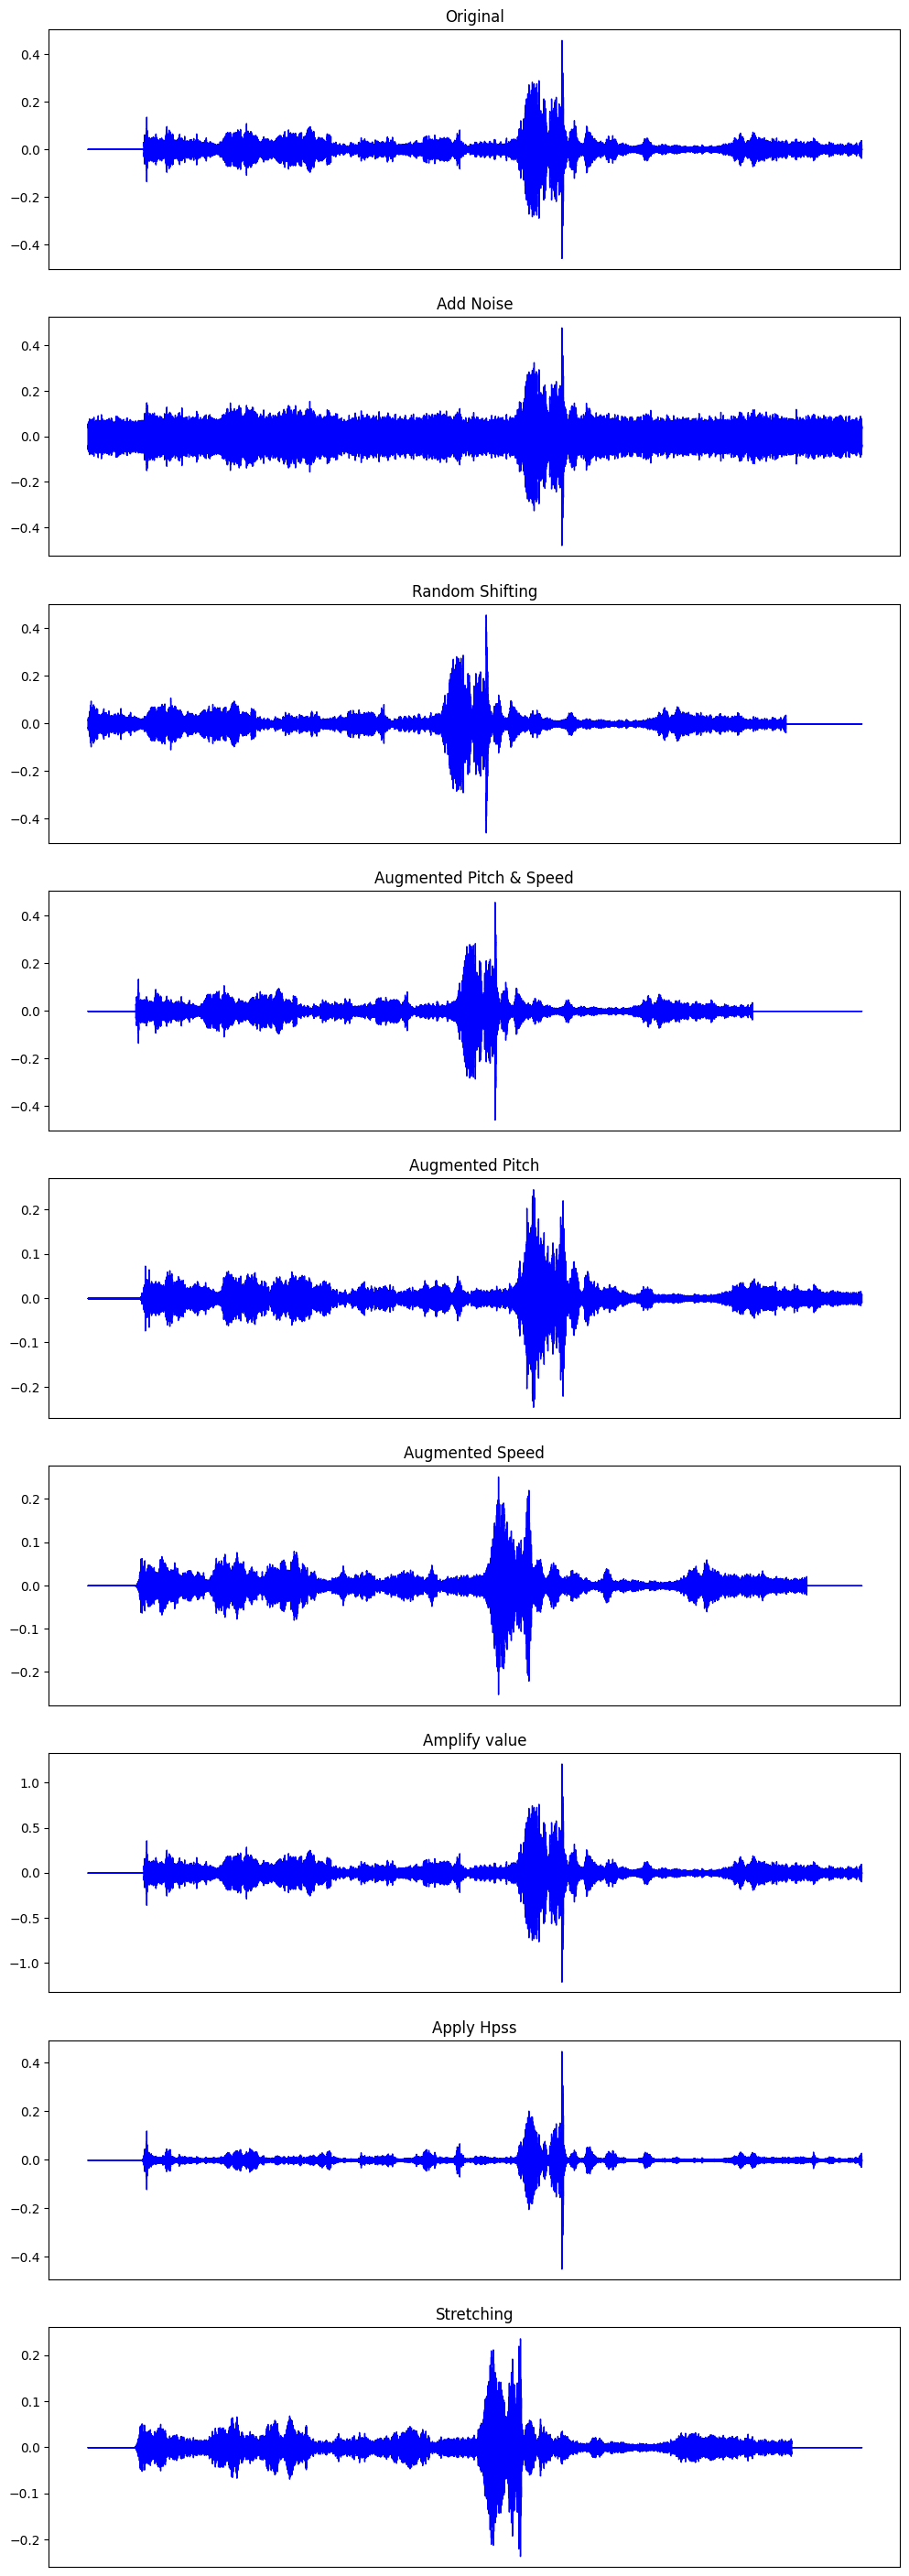

In [272]:
plt.figure(figsize=(12, 4*9))
plt.subplot(9, 1, 1)
librosa.display.waveshow(sig.astype('float'), sr=sr,axis=None,color='blue')
plt.title('Original')
plt.subplot(9, 1, 2)
librosa.display.waveshow(noising_data.astype('float'), sr=sr,axis=None,color='blue')
plt.title('Add Noise')
plt.subplot(9, 1, 3)
librosa.display.waveshow(shifting_data.astype('float'), sr=sr,axis=None,color='blue')
plt.title('Random Shifting')
plt.subplot(9, 1, 4)
librosa.display.waveshow(y_pitch_speed.astype('float'), sr=sr,axis=None,color='blue')
plt.title('Augmented Pitch & Speed')
plt.subplot(9, 1, 5)
librosa.display.waveshow(pitch_data, sr=sr,axis=None,color='blue')
plt.title('Augmented Pitch')
plt.subplot(9, 1, 6)
librosa.display.waveshow(y_speed, sr=sr,axis=None,color='blue')
plt.title('Augmented Speed')
plt.subplot(9, 1, 7)
librosa.display.waveshow(y_aug.astype('float'), sr=sr,axis=None,color='blue')
plt.title('Amplify value')
plt.subplot(9, 1, 8)
librosa.display.waveshow(y_hpss[1], sr=sr,axis=None,color='blue')
plt.title('Apply Hpss')
plt.subplot(9, 1, 9)
librosa.display.waveshow(streching, sr=sr,axis=None,color='blue')
plt.title('Stretching')
plt.show()